In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

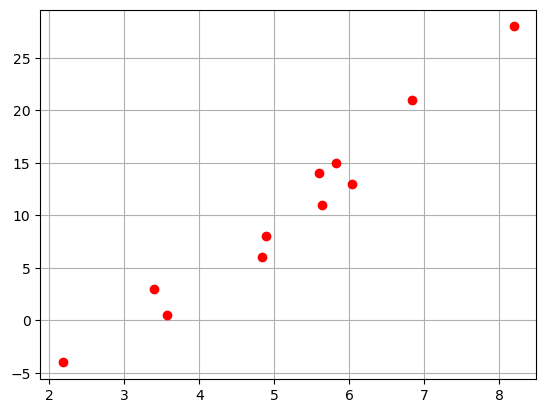

In [3]:
plt.plot(t_un, t_c, 'ro')
plt.grid(True)

# Fitting Linear Model (manually)

In [4]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [7]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [8]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [9]:
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

# Using NN

In [21]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [22]:
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = 0.1*torch.tensor(t_u).unsqueeze(1) # this scaling is really important as otherwise the optimizer does not converge!!

In [13]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [14]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u)
        loss_train = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")

In [15]:
training_loop(n_epochs = 3000, optimizer = optimizer, model = linear_model, loss_fn = nn.MSELoss(), t_u = t_u, t_c = t_c)

Epoch 1, Training loss 207.0020
Epoch 1000, Training loss 3.8404
Epoch 2000, Training loss 2.9581
Epoch 3000, Training loss 2.9287


In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[5.3487]], requires_grad=True),
 Parameter containing:
 tensor([-17.1973], requires_grad=True)]

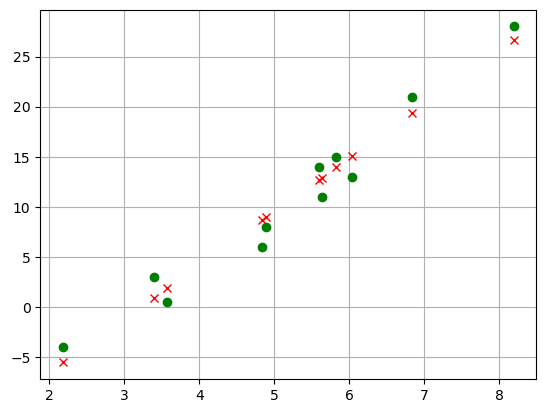

In [17]:
plt.plot(t_u, linear_model(t_u).detach().numpy(), 'rx')
plt.plot(t_u, t_c, 'go')
plt.grid()

Now a non-linear model

In [18]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13,1))

In [29]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

In [30]:
training_loop(n_epochs = 3000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), t_u = t_u, t_c = t_c)

Epoch 1, Training loss 169.7350
Epoch 1000, Training loss 8.0774
Epoch 2000, Training loss 2.5836
Epoch 3000, Training loss 1.9017


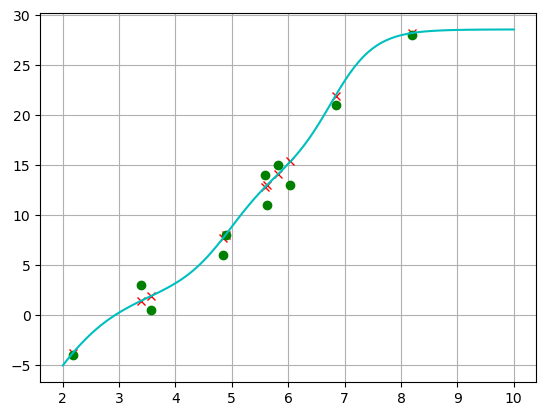

In [39]:
t_range = torch.linspace(2., 10, steps = 100).unsqueeze(1)

plt.plot(t_u, seq_model(t_u).detach().numpy(), 'rx')
plt.plot(t_u, t_c, 'go')

plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'c-')

plt.grid()